In [3]:
# default_exp algo.dl.pytorch

%reload_ext autoreload
%autoreload 2

In [ ]:
algo_dl_pytorch

# pytorch


PyTorch是由Facebook的人工智能部门开发的机器学习和深度学习工具。 

它是使用Python和C ++语言编写的。 

PyTorch是一个Python软件包，提供两个高级功能：

     具有强大GPU加速功能的Tensor计算（如NumPy）

     基于a tape-based autograd system构建的深度神经网络

您可以在需要时重用自己喜欢的Python软件包（例如NumPy，SciPy和Cython）来扩展PyTorch。

https://pytorch.org/

https://github.com/pytorch/pytorch

https://pytorch.org/tutorials/

In [7]:
# !pip install torch -i https://pypi.tuna.tsinghua.edu.cn/simple

!pip freeze | grep torch

torch==1.5.0
torchtext==0.2.3
torchvision==0.4.2


In [1]:
import torch

In [2]:
torch.version.__version__

'1.5.0'

In [120]:
torch.cuda.is_available()

False

# Deep Learning with PyTorch: A 60 Minute Blitz
https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html



## What is PyTorch?
It’s a Python-based scientific computing package targeted at two sets of audiences:

    A replacement for NumPy to use the power of GPUs
    a deep learning research platform that provides maximum flexibility and speed

### Tensors

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

#### Construct a randomly initialized matrix:
声明了一个未初始化的矩阵，但在使用前不包含确定的已知值。

In [6]:
x = torch.empty(5, 3)
x

tensor([[3.2870e+21, 5.2059e+22, 3.3091e+21],
        [4.2931e-08, 1.6800e-07, 3.1369e+27],
        [7.0800e+31, 3.1095e-18, 7.7052e+31],
        [1.9447e+31, 2.0558e+32, 1.8755e+28],
        [3.1093e-18, 2.9934e+32, 1.8528e+28]])

#### Construct a randomly initialized matrix:

In [5]:
x = torch.rand(5, 3)
x

tensor([[0.0839, 0.7643, 0.4382],
        [0.3033, 0.8193, 0.1281],
        [0.8989, 0.9061, 0.7433],
        [0.7744, 0.4719, 0.5584],
        [0.0186, 0.3912, 0.1602]])

In [14]:
torch.rand([5, 3])

tensor([[0.2089, 0.9806, 0.0208],
        [0.7804, 0.7623, 0.2842],
        [0.5789, 0.3133, 0.7181],
        [0.8390, 0.3254, 0.5421],
        [0.4275, 0.0809, 0.6184]])

#### Construct a matrix filled zeros and of dtype long:

In [7]:
x = torch.zeros(5, 3, dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [10]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

#### Construct a tensor directly from data:

In [8]:
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

或基于现有张量创建张量。 这些方法将重用输入张量的属性，例如 dtype，除非用户提供新值

In [9]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [9]:
x = torch.randn_like(x, dtype=torch.float)    # override dtype!
x

tensor([[-0.0423, -2.0605,  0.8602],
        [-1.4862, -0.5069, -0.6064],
        [ 0.4644,  1.2580, -0.0618],
        [-1.2663, -2.2096,  3.1719],
        [-0.3130,  1.2931, -0.4638]])

#### Get its size:

In [11]:
x.size()

torch.Size([5, 3])

In [12]:
x.shape

torch.Size([5, 3])

### Operations

In [13]:
y = torch.rand(5, 3)

#### Addition: syntax 1

In [13]:
x + y

tensor([[ 0.7032, -1.2390,  1.5754],
        [-1.3122, -0.1154, -0.2655],
        [ 1.1924,  1.6143,  0.1924],
        [-0.5584, -1.9609,  3.2666],
        [-0.1971,  1.6196, -0.4365]])

#### Addition: syntax 2

In [14]:
torch.add(x, y)

tensor([[ 0.7032, -1.2390,  1.5754],
        [-1.3122, -0.1154, -0.2655],
        [ 1.1924,  1.6143,  0.1924],
        [-0.5584, -1.9609,  3.2666],
        [-0.1971,  1.6196, -0.4365]])

#### Addition: providing an output tensor as argument

In [15]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)  # 这样的好处是节约内存
result

tensor([[ 0.7032, -1.2390,  1.5754],
        [-1.3122, -0.1154, -0.2655],
        [ 1.1924,  1.6143,  0.1924],
        [-0.5584, -1.9609,  3.2666],
        [-0.1971,  1.6196, -0.4365]])

#### Addition: in-place
Any operation that mutates a tensor in-place is post-fixed with an `_`. For example: `x.copy_(y), x.t_()`, will change x.

In [16]:
y.add_(x)
y

tensor([[ 0.7032, -1.2390,  1.5754],
        [-1.3122, -0.1154, -0.2655],
        [ 1.1924,  1.6143,  0.1924],
        [-0.5584, -1.9609,  3.2666],
        [-0.1971,  1.6196, -0.4365]])

您可以使用标准的与numty类似的索引来实现所有功能

In [18]:
x[:, 1]

tensor([-2.0605, -0.5069,  1.2580, -2.2096,  1.2931])

#### Resizing: If you want to resize/reshape tensor, you can use torch.view:

In [15]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [18]:
x.reshape(-1, 8)

tensor([[ 0.7351,  1.3273,  0.6753,  1.5732, -1.6490, -1.0935,  0.2658,  0.8934],
        [ 0.3362, -0.4389,  0.5252, -1.4052,  1.5856,  2.4997, -0.8547,  1.3175]])

If you have a one element tensor, use .item() to get the value as a Python number

In [20]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.3911])
-0.3911091685295105


### NumPy Bridge

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory locations (if the Torch Tensor is on CPU), and changing one will change the other.

#### Converting a Torch Tensor to a NumPy Array

In [21]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [22]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [24]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


#### Converting NumPy Array to Torch Tensor

In [25]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)


[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### CUDA Tensors
ensors can be moved onto any device using the .to method.



In [ ]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

Out:

    tensor([-0.2550], device='cuda:0')
    tensor([-0.2550], dtype=torch.float64)

## Autograd: Automatic Differentiation
https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

PyTorch中所有神经网络的核心是autograd软件包。 让我们先简要地介绍一下，然后再训练第一个神经网络。

autograd软件包为Tensor上的所有操作提供自动区分。 这是一个按运行定义的框架，这意味着您的backprop是由代码的运行方式定义的，并且每次迭代都可以不同。

让我们通过一些示例以更简单的方式看待这一点。


### Tensor
Torch.Tensor是程序包的中心类。 如果将其属性`.requires_grad`设置为True，它将开始跟踪对其的所有操作。 

完成计算后，您可以调用`.backward（）`并自动计算所有gradients。 该张量的梯度将累积到.grad属性中。

要停止张量跟踪历史记录，可以调用`.detach（）`将其与计算历史记录分离，并防止跟踪将来的计算。

为了防止跟踪历史记录（和使用内存），您还可以使用`torch.no_grad（）`：包装代码块。 这在评估模型时特别有用，因为模型可能具有可训练的参数，且`require_grad=True`，但我们不需要gradients。

There’s one more class which is very important for autograd implementation - a Function.

Tensor and Function are interconnected and build up an acyclic graph(无环图), that encodes a complete history of computation. 每个张量都有一个.grad_fn属性，该属性引用创建了张量的函数（用户创建的张量除外-它们的grad_fn为None）。

如果要计算导数，可以在Tensor上调用.backward（）。 如果Tensor是标量（即，它包含一个元素数据），则无需为Backward（）指定任何参数，但是，如果Tensor具有更多元素，则需要指定渐变参数，该参数是形状匹配的张量 。

In [20]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [21]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [22]:
print(y.grad_fn)

In [23]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


.requires_grad_( ... ) changes an existing Tensor’s requires_grad flag in-place. The input flag defaults to False if not given.

In [30]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


### Gradients
Let’s backprop now. Because out contains a single scalar, out.backward() is equivalent to out.backward(torch.tensor(1.)).

In [24]:
out

tensor(27., grad_fn=<MeanBackward0>)

In [25]:
out.backward()

Print gradients d(out)/dx

In [26]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

## Neural Networks
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py

可以使用torch.nn包构建神经网络。

现在您已经了解了autograd，nn依靠autograd定义模型并对其进行区分。 nn.Module包含图层以及返回输出的方法forward（input）。

这是一个简单的前馈网络。 它获取输入，将其一层又一层地馈入，然后最终给出输出。

神经网络的典型训练过程如下：

定义具有一些可学习参数（或权重）的神经网络

遍历输入数据集

通过网络处理输入

计算损失（输出正确的距离有多远）

将渐变传播回网络参数

通常使用简单的更新规则来更新网络的权重：权重=权重-learning_rate *梯度

### Define the network

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the forward function, and the backward function (where gradients are computed) is automatically defined for you using autograd. You can use any of the Tensor operations in the forward function.

The learnable parameters of a model are returned by net.parameters()



In [47]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [48]:
type(params[0])

torch.nn.parameter.Parameter

In [49]:
params[0]

Parameter containing:
tensor([[[[ 0.1999,  0.2530, -0.2831],
          [-0.0439, -0.1528, -0.0559],
          [ 0.0339,  0.3140,  0.0404]]],


        [[[-0.2021, -0.2145, -0.2619],
          [ 0.1274, -0.0834, -0.2485],
          [ 0.0629,  0.1619,  0.0973]]],


        [[[ 0.0882, -0.2897,  0.3128],
          [-0.1747,  0.2634,  0.1911],
          [ 0.2923,  0.0829,  0.1996]]],


        [[[-0.2798, -0.1275, -0.0258],
          [-0.1741, -0.1414,  0.2522],
          [-0.2951,  0.1101, -0.0925]]],


        [[[-0.2216,  0.0712,  0.0358],
          [-0.0395, -0.0431,  0.2562],
          [ 0.1782,  0.1885,  0.1876]]],


        [[[-0.0326, -0.3080,  0.0519],
          [ 0.3257, -0.1819, -0.1857],
          [ 0.2332, -0.3239, -0.0098]]]], requires_grad=True)

让我们尝试一个32x32随机输入。 注意：该网络的预期输入大小（LeNet）为32x32。 要在MNIST数据集上使用此网络，请将图像从数据集中调整为32x32。

In [52]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0713,  0.1089, -0.0452, -0.0585, -0.0935,  0.0098, -0.2002, -0.0618,
         -0.0777,  0.0434]], grad_fn=<AddmmBackward>)


In [53]:
# 将梯度缓冲区归零， 用随机梯度进行反向传播：
net.zero_grad()
out.backward(torch.randn(1, 10))

### Loss Function

In [54]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)


tensor(1.0047, grad_fn=<MseLossBackward>)


In [55]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU


### Backprop

To backpropagate the error all we have to do is to loss.backward(). You need to clear the existing gradients though, else gradients will be accumulated to existing gradients.

Now we shall call loss.backward(), and have a look at conv1’s bias gradients before and after the backward.

In [56]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0125,  0.0180, -0.0034, -0.0196,  0.0072,  0.0050])


### Update the weights

In [57]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

但是，在使用神经网络时，您希望使用各种不同的更新规则，例如SGD，Nesterov-SGD，Adam，RMSProp等。为实现此目的，我们构建了一个小程序包：torch.optim，它实现了所有这些方法。 使用它非常简单：

In [58]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update


## Training a Classifier
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.


### Loading and normalizing CIFAR10

In [59]:
import torch
import torchvision
import torchvision.transforms as transforms

In [60]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [61]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

<Figure size 640x480 with 1 Axes>

  car  deer  frog  frog


### Define a Convolutional Neural Network

In [126]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Define a Loss function and optimizer

In [63]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [64]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.172
[1,  4000] loss: 1.842
[1,  6000] loss: 1.678
[1,  8000] loss: 1.596
[1, 10000] loss: 1.516
[1, 12000] loss: 1.474
[2,  2000] loss: 1.389
[2,  4000] loss: 1.377
[2,  6000] loss: 1.371
[2,  8000] loss: 1.330
[2, 10000] loss: 1.315
[2, 12000] loss: 1.308
Finished Training


In [65]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Test the network on the test data

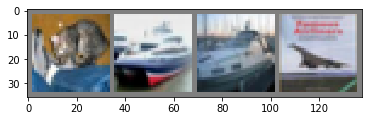

GroundTruth:    cat  ship  ship plane


In [66]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


# torch.autograd

In [27]:
from torch import autograd

In [43]:
x = torch.tensor(1.)
a = torch.tensor(1., requires_grad=True)
b = torch.tensor(2., requires_grad=True)
c = torch.tensor(3., requires_grad=True)

In [44]:
y = a**2*x + b*x + c

In [41]:
y.backward() 
a.grad, b.grad, c.grad

(tensor(2.), tensor(1.), tensor(1.))

In [45]:
# or 
autograd.grad(y, [a,b,c])

(tensor(2.), tensor(1.), tensor(1.))

# torch api
https://pytorch.org/docs/stable/torch.html

# torch.utils.data
## DataLoader
## Dataset


In [125]:
from torch.utils.data import DataLoader, Dataset

In [ ]:
DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)